# Logistic Regression

<b>Is used for CLASSIFICATION</b>

## Estimation
<b> &#375; = wx + b </b>

<b>Sigmoid Function</b>:
$$
s(x) = \frac{1}{1 + e^{-x}}
$$

We want to place our values in the sigmoid to make binary classification.

So by applying the sigmoid function we get:

$$
h_0(x) = \frac{1}{1 + e^{-(wx + b)}}
$$

## Error
We are calculating the error using cross-entropy error function
$$
J(w, b) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(h_\theta(x^{(i)})) + (1 - y_i) \log(1 - h_\theta(x^{(i)})) \right]
$$

### Then we use gradient descent:
$$
\frac{\partial J(w, b)}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} \left( h_\theta(x^{(i)}) - y_i \right) x^{(i)}
$$

$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} \left( h_\theta(x^{(i)}) - y_i \right)
$$

so we get:
$$
J'(\theta) =
\begin{bmatrix}
\frac{\partial J(w, b)}{\partial w} \\
\frac{\partial J(w, b)}{\partial b}
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{N} \sum_{i=1}^{N} \left( h_\theta(x^{(i)}) - y_i \right) x^{(i)} \\
\frac{1}{N} \sum_{i=1}^{N} \left( h_\theta(x^{(i)}) - y_i \right)
\end{bmatrix}
$$


## Gradient Descent:
Minimize the error by using a learning rate a:

w -> w - a * dw
b -> b - a * db


## Steps
1. Training:
    * Initialize weights as zero
    * Initialize bias as zero
2. Given a data point:
    * Predict result by using &#375; = 1/(1+e^(-wx+b))
    * Calculate error
    * Use gradient descent to figure out new weight and bias values
    * Repeat n times

In [5]:
import numpy as np
from sklearn import datasets

In [6]:
dataset = datasets.load_breast_cancer()

In [7]:
X,y = dataset.data, dataset.target

In [10]:
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [11]:
y[:5]

array([0, 0, 0, 0, 0])

In [18]:
import pandas as pd

In [20]:
breast_cancer = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
breast_cancer['target'] = dataset.target

In [21]:
breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [23]:
corr_matrix = breast_cancer.corr()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

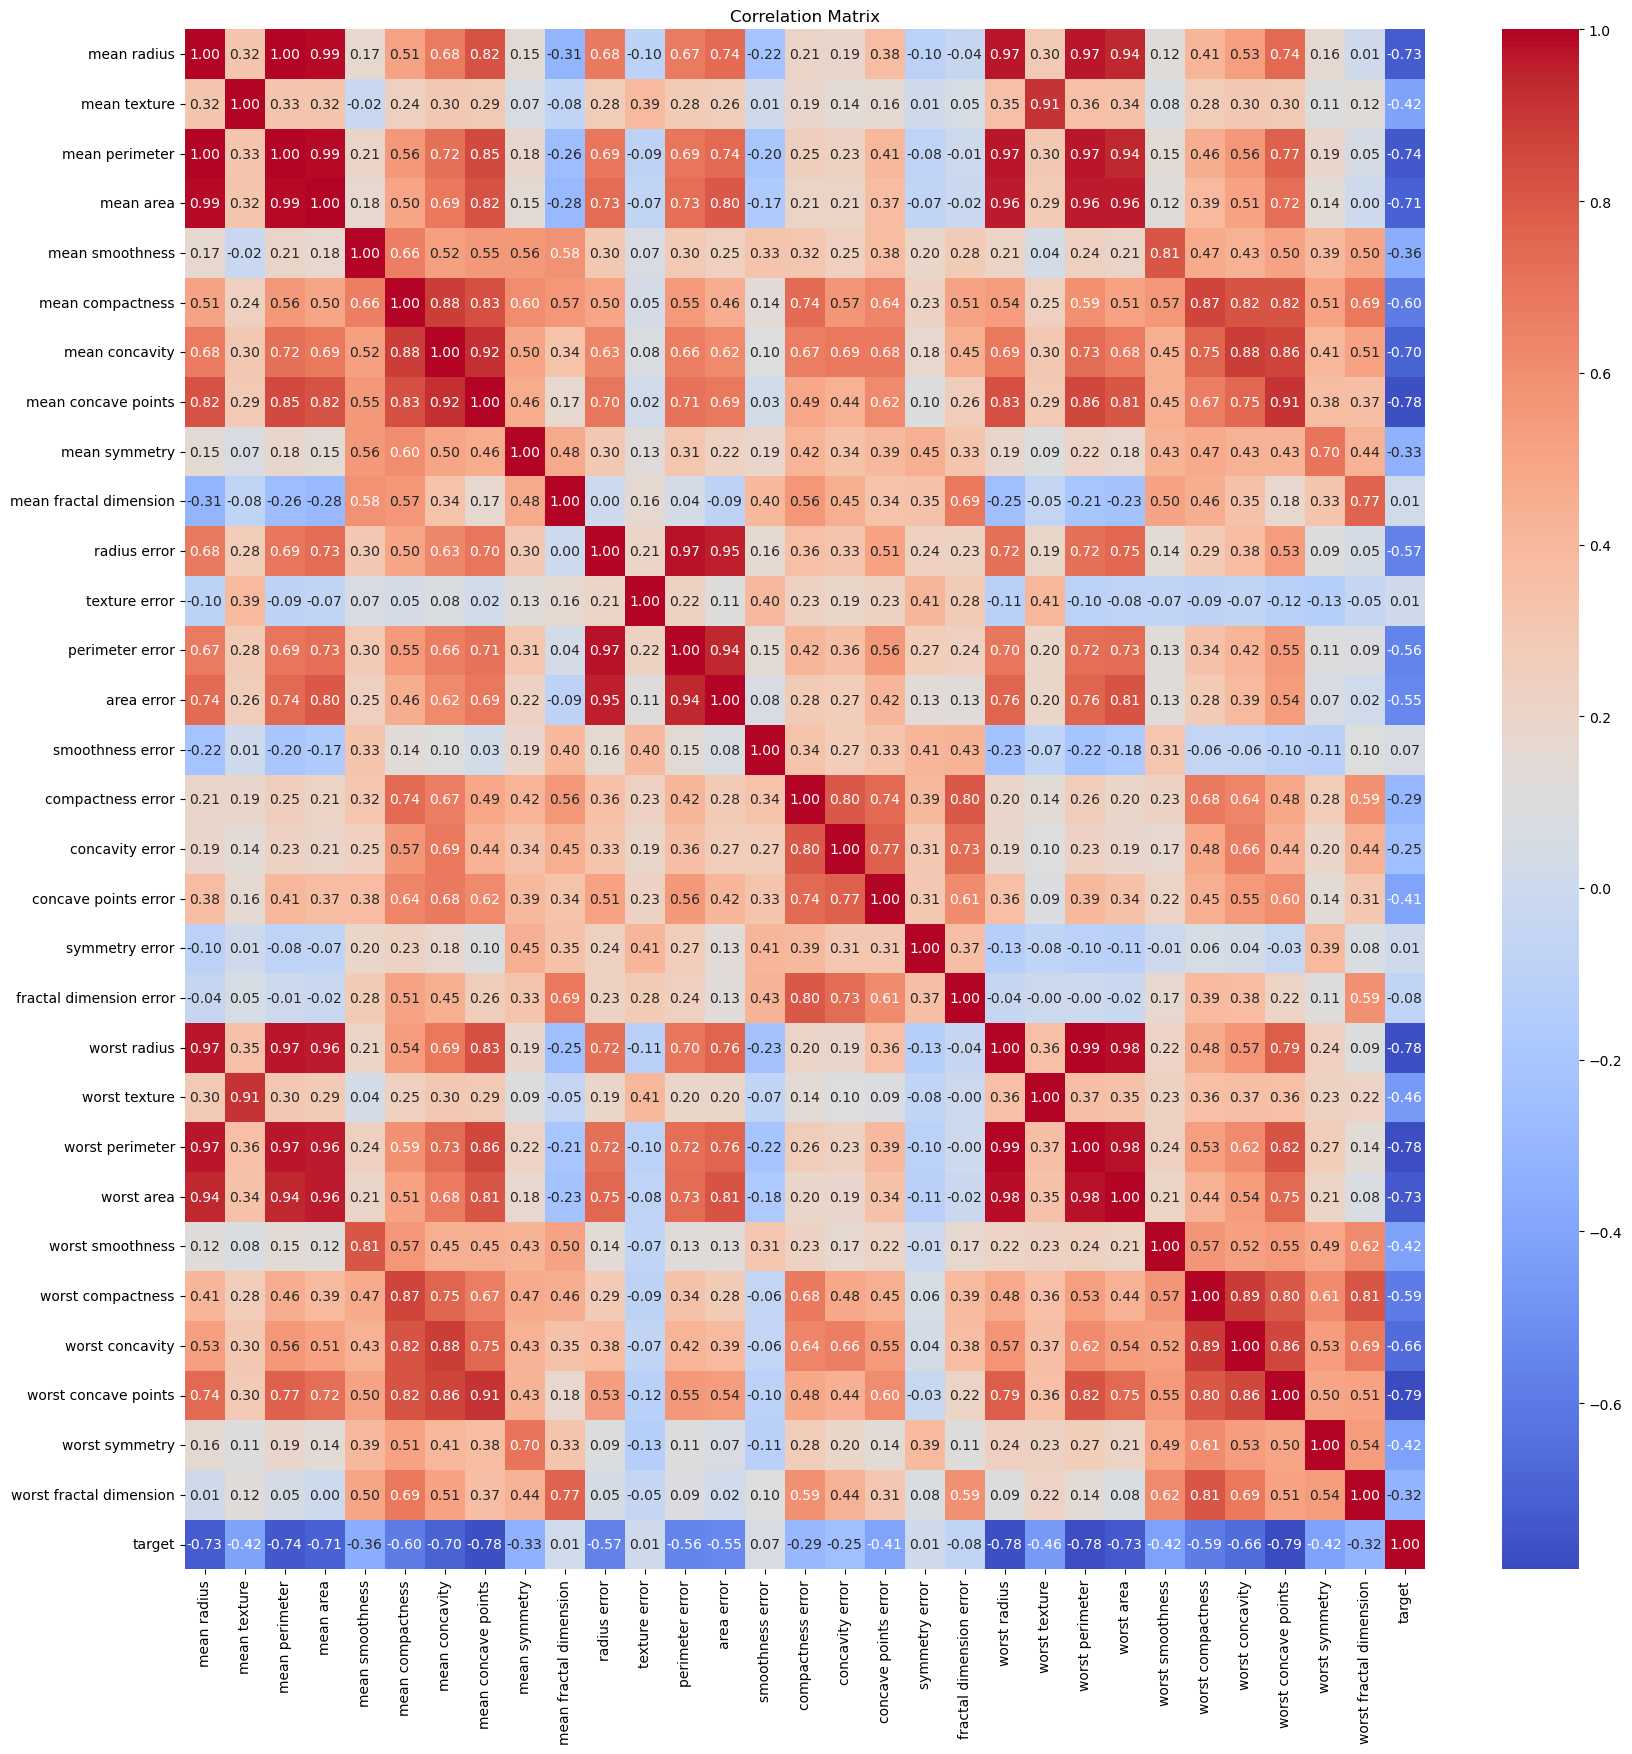

In [28]:
plt.figure(figsize=(20,20))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [38]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias # y = x*w + b
            predictions = sigmoid(linear_pred)
            
            # Calculate the gradients
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)
            
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
    
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias # y = x*w + b
        y_pred = sigmoid(linear_pred)

        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred

In [42]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

In [43]:
lreg = LogisticRegression()

In [44]:
lreg.fit(X_train, y_train)

In [46]:
y_pred = lreg.predict(X_test)

In [47]:
y_pred

[1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0]

In [48]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)

In [49]:
accuracy(y_pred, y_test)

0.8947368421052632

# Use sklearn

In [59]:
from sklearn.linear_model import LogisticRegression

In [67]:
logistic_regression = LogisticRegression()

In [68]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = logistic_regression.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,y_pred)

0.956140350877193

# PCA

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=2)

In [76]:
X_reduced = pca.fit_transform(X)

In [77]:
X_reduced

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [81]:
pca_df = pd.DataFrame(X_reduced, columns=['PC1','PC2'])
pca_df['target'] = y

In [82]:
pca_df

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


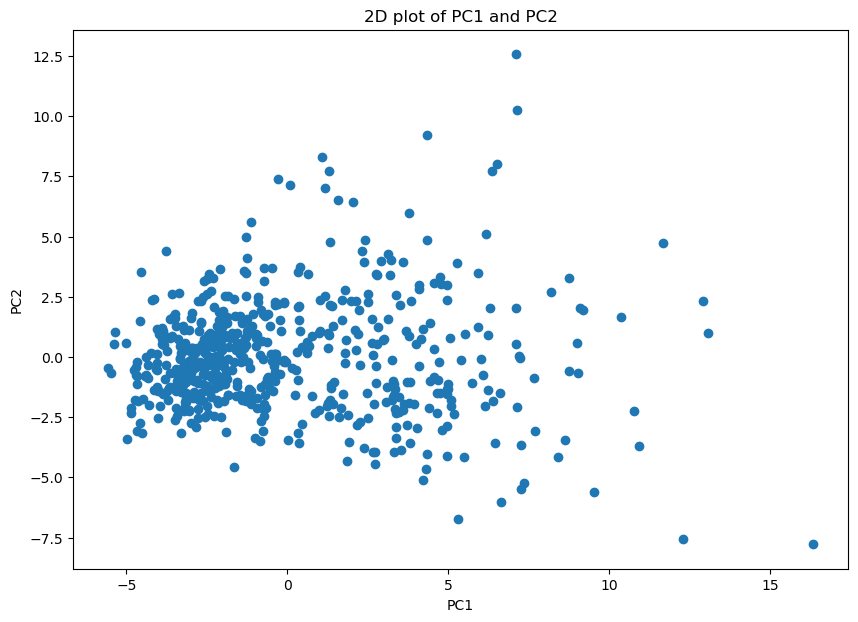

In [84]:
# 2d plot
plt.figure(figsize=(10,7))
plt.title("2D plot of PC1 and PC2")
plt.scatter(x=pca_df['PC1'], y=pca_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

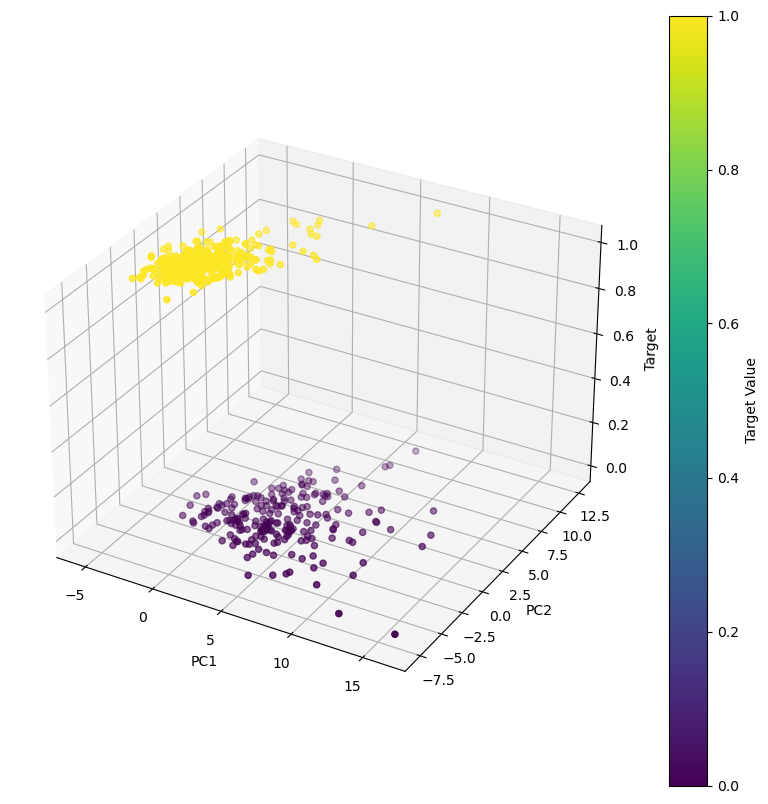

In [92]:
# 3D plot with color based on target (continuous)
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')

x = pca_df['PC1']
y = pca_df['PC2']
z = pca_df['target']

# Scatter plot with color mapping
scatter = ax.scatter(x, y, z, c=z, cmap='viridis')

# Set axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Target')

# Add color bar
plt.colorbar(scatter, ax=ax, label='Target Value')

plt.show()

In [99]:
X = pca_df[['PC1','PC2']]

In [100]:
y = pca_df['target']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [102]:
from sklearn.linear_model import LogisticRegression

In [113]:
logistic_regression = LogisticRegression()

In [114]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [115]:
y_pred = logistic_regression.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy is {acc}')

Accuracy is 0.8947368421052632


In [118]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [124]:
X,y = dataset.data, dataset.target

In [125]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

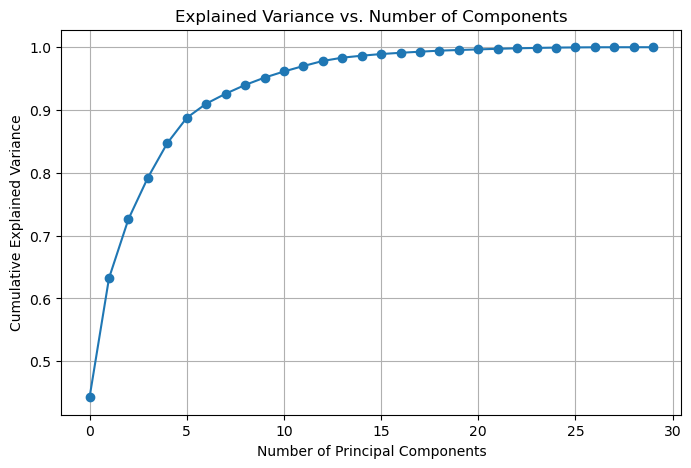

In [128]:
pca = PCA()
X_pca = pca.fit_transform(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [129]:
threshold = 0.9  # 90% variance
num_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Optimal number of components: {num_components}")

Optimal number of components: 7


In [130]:
pca = PCA(n_components=7)

In [131]:
X_reduced = pca.fit_transform(X)

In [132]:
pca_df = pd.DataFrame(X_reduced, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
pca_df['target'] = y

In [133]:
X = pca_df[['PC1','PC2','PC3','PC4','PC5','PC6','PC7']]
y = pca_df['target']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [135]:
logistic_regression = LogisticRegression()

In [136]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [137]:
y_pred = logistic_regression.predict(X_test)

In [138]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy is {acc}')

Accuracy is 0.9239766081871345
